<a href="https://colab.research.google.com/github/Dheva-Sri-Angraini/NLP/blob/main/clusterisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1: Memuat dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

# Langkah 2: Praproses data
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])

# Langkah 3: Memilih variabel dan normalisasi data
features = titanic_data[['Age', 'Fare', 'Sex']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Langkah 4: Menerapkan algoritma klusterisasi
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(features_scaled)

# Mean Shift
mean_shift = MeanShift()
ms_labels = mean_shift.fit_predict(features_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Langkah 5: Menghitung Silhouette Score untuk setiap algoritma
silhouette_scores = {
    'Hierarchical Clustering': silhouette_score(features_scaled, hc_labels),
    'Mean Shift': silhouette_score(features_scaled, ms_labels),
    'DBSCAN': silhouette_score(features_scaled, dbscan_labels)
}

# Menampilkan hasil perbandingan
print("Silhouette Scores:")
for algo, score in silhouette_scores.items():
    print(f"{algo}: {score}")


Silhouette Scores:
Hierarchical Clustering: 0.4854535669781175
Mean Shift: 0.504363983440315
DBSCAN: 0.5035956743579202


In [6]:
# Membuat DataFrame dari hasil skor Silhouette
silhouette_scores_df = pd.DataFrame(list(silhouette_scores.items()), columns=['Algoritma', 'Silhouette Score'])

# Menampilkan tabel
print("Tabel Skor Silhouette:")
print(silhouette_scores_df)

Tabel Skor Silhouette:
                 Algoritma  Silhouette Score
0  Hierarchical Clustering          0.485454
1               Mean Shift          0.504364
2                   DBSCAN          0.503596


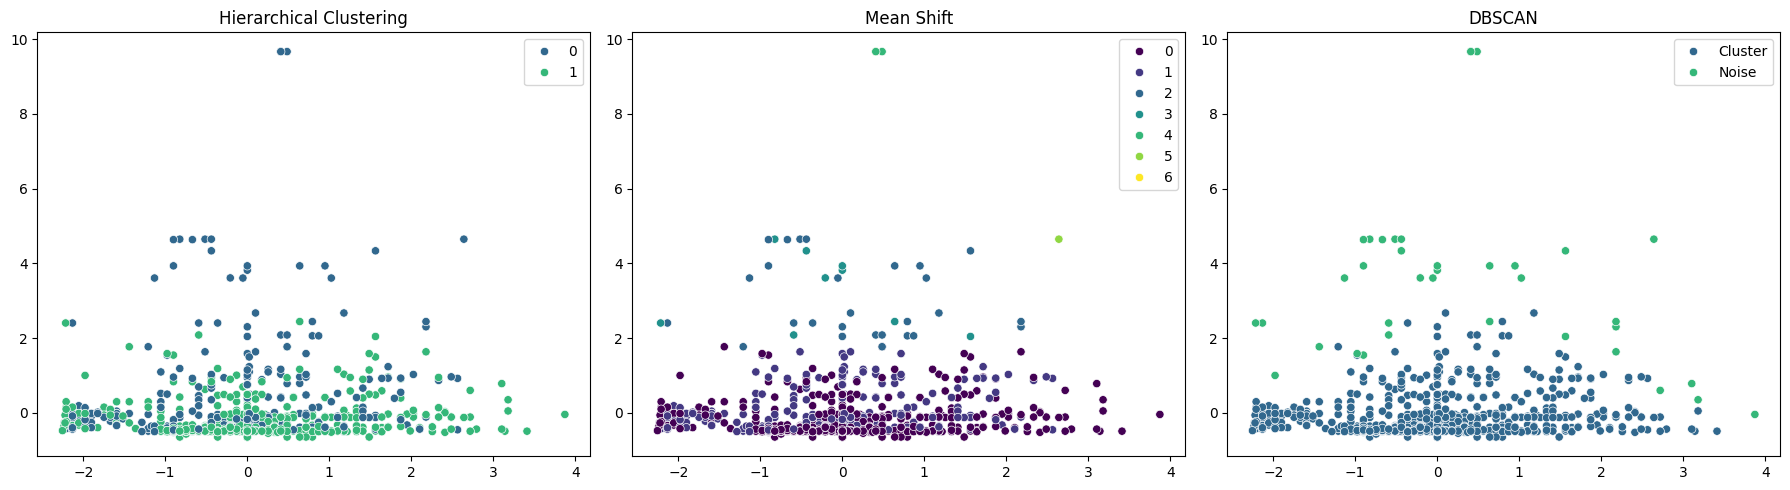

In [5]:

# Visualisasi hasil kluster untuk Hierarchical Clustering, Mean Shift, dan DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Membuat 3 subplot

# Hierarchical Clustering
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=hc_labels, ax=axes[0], palette='viridis')
axes[0].set_title('Hierarchical Clustering')

# Mean Shift
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=ms_labels, ax=axes[1], palette='viridis')
axes[1].set_title('Mean Shift')

# DBSCAN
# Menyesuaikan label untuk visualisasi (DBSCAN mungkin memiliki label -1 untuk noise)
adjusted_dbscan_labels = ['Noise' if x == -1 else 'Cluster' for x in dbscan_labels]
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=adjusted_dbscan_labels, ax=axes[2], palette='viridis')
axes[2].set_title('DBSCAN')

plt.tight_layout()
plt.show()
